In [80]:
# This R environment comes with many helpful analytics packages installed
# loading library

library(tidyverse) # metapackage of all tidyverse packages
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Step 1:** Begin import ing your data.

In [81]:
# loading data
activity <- read.csv("/kaggle/input/fitbitdata/dailyActivity_merged.csv")
calories <- read.csv("/kaggle/input/fitbitdata/hourlyCalories_merged.csv")
intensities <- read.csv("/kaggle/input/fitbitdata/hourlyIntensities_merged.csv")
sleep <- read.csv("/kaggle/input/fitbitdata/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbitdata/weightLogInfo_merged.csv")


In [82]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


**3. Exploring the Data**

1. Check Structure of Each Dataset:

We want to understand the columns, data types, and structure of each dataset.

In [83]:
# Check structure of activity dataset
str(activity)

# Check structure of calories dataset
str(calories)

# Check structure of intensities dataset
str(intensities)

# Check structure of sleep dataset
str(sleep)

# Check structure of weight dataset
str(weight)


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

2. Summarize Each Dataset:

Summarizing provides an overview of the data, such as the mean, median, min, max, and quartiles of numeric columns.

In [84]:
# Summary statistics for activity dataset
summary(activity)

# Summary statistics for calories dataset
summary(calories)

# Summary statistics for intensities dataset
summary(intensities)

# Summary statistics for sleep dataset
summary(sleep)

# Summary statistics for weight dataset
summary(weight)


       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

       Id            ActivityHour          Calories     
 Min.   :1.504e+09   Length:22099       Min.   : 42.00  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 63.00  
 Median :4.445e+09   Mode  :character   Median : 83.00  
 Mean   :4.848e+09                      Mean   : 97.39  
 3rd Qu.:6.962e+09                      3rd Qu.:108.00  
 Max.   :8.878e+09                      Max.   :948.00  

       Id            ActivityHour       TotalIntensity   AverageIntensity
 Min.   :1.504e+09   Length:22099       Min.   :  0.00   Min.   :0.0000  
 1st Qu.:2.320e+09   Class :character   1st Qu.:  0.00   1st Qu.:0.0000  
 Median :4.445e+09   Mode  :character   Median :  3.00   Median :0.0500  
 Mean   :4.848e+09                      Mean   : 12.04   Mean   :0.2006  
 3rd Qu.:6.962e+09                      3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :8.878e+09                      Max.   :180.00   Max.   :3.0000  

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport         LogId          
 Min.   :22.00   Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                      3rd 

3. Check for Missing Values:

To determine if there are any missing values in the datasets, we can use colSums(is.na()).

In [85]:
# Check for missing values in activity dataset
colSums(is.na(activity))

# Check for missing values in calories dataset
colSums(is.na(calories))

# Check for missing values in intensities dataset
colSums(is.na(intensities))

# Check for missing values in sleep dataset
colSums(is.na(sleep))

# Check for missing values in weight dataset
colSums(is.na(weight))


Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

Id ActivityHour     Calories 
           0            0            0

Id     ActivityHour   TotalIntensity AverageIntensity 
               0                0                0                0

Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed 
                 0

Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId 
             0              0              0

4. Check for Duplicates:

Duplicates may affect the quality of analysis. Let’s check if there are any duplicate rows in the datasets.

In [86]:
# Check for duplicates in activity dataset
sum(duplicated(activity))

# Check for duplicates in calories dataset
sum(duplicated(calories))

# Check for duplicates in intensities dataset
sum(duplicated(intensities))

# Check for duplicates in sleep dataset
sum(duplicated(sleep))

# Check for duplicates in weight dataset
sum(duplicated(weight))


[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

**Detecting Outliers Programmatically:**

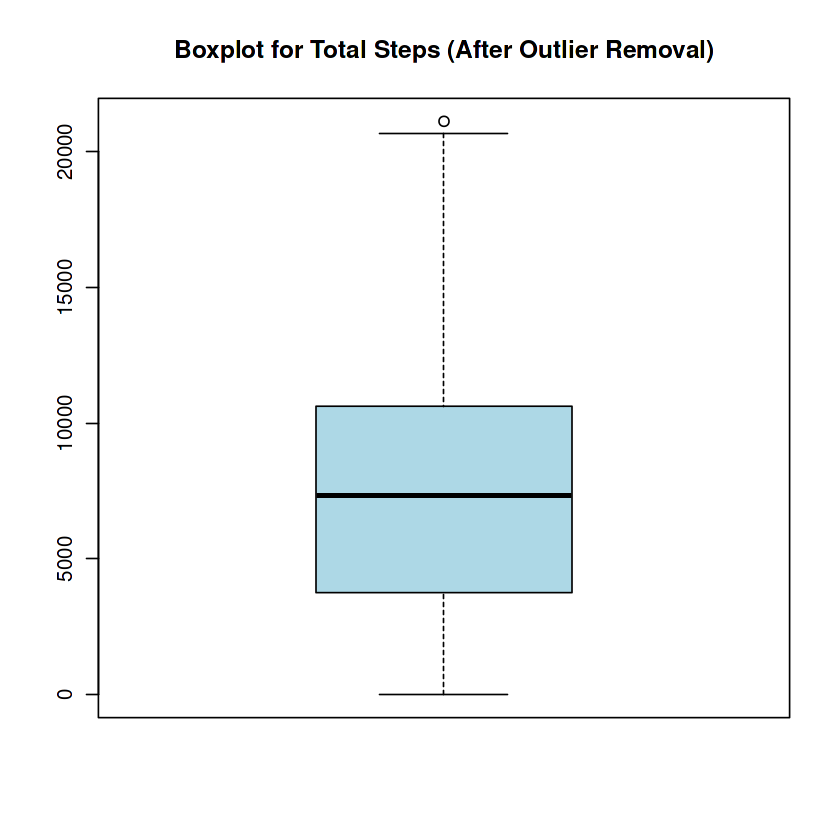

In [87]:
# Detect outliers in TotalSteps using IQR method
Q1 <- quantile(activity$TotalSteps, 0.25)
Q3 <- quantile(activity$TotalSteps, 0.75)
IQR_steps <- Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound <- Q1 - 1.5 * IQR_steps
upper_bound <- Q3 + 1.5 * IQR_steps

# Filter out outliers
activity_clean <- activity %>%
  filter(TotalSteps >= lower_bound & TotalSteps <= upper_bound)

# Check if outliers have been removed
boxplot(activity_clean$TotalSteps, main="Boxplot for Total Steps (After Outlier Removal)", col="lightblue")



1. Remove Duplicates from the Sleep Dataset:

In [88]:
# Remove duplicates from sleep dataset
sleep_clean <- sleep %>% distinct()

# Verify that duplicates are removed
sum(duplicated(sleep_clean))


[1] 0

**Step 4: Analyze Phase and Visualization**

Objective: Extract Insights from the Data
In this phase, we will analyze the cleaned data to uncover trends and relationships that can guide Bellabeat's marketing strategy. The key questions we need to address are:

1. What trends exist in smart device usage (e.g., activity, sleep, calorie burn)?
2. How can these trends apply to Bellabeat's products?
3. How can these trends inform Bellabeat's marketing strategy?


**1. Daily Activity Analysis (Steps and Activity Levels):**

[1] "Average steps per day:  7418.32"


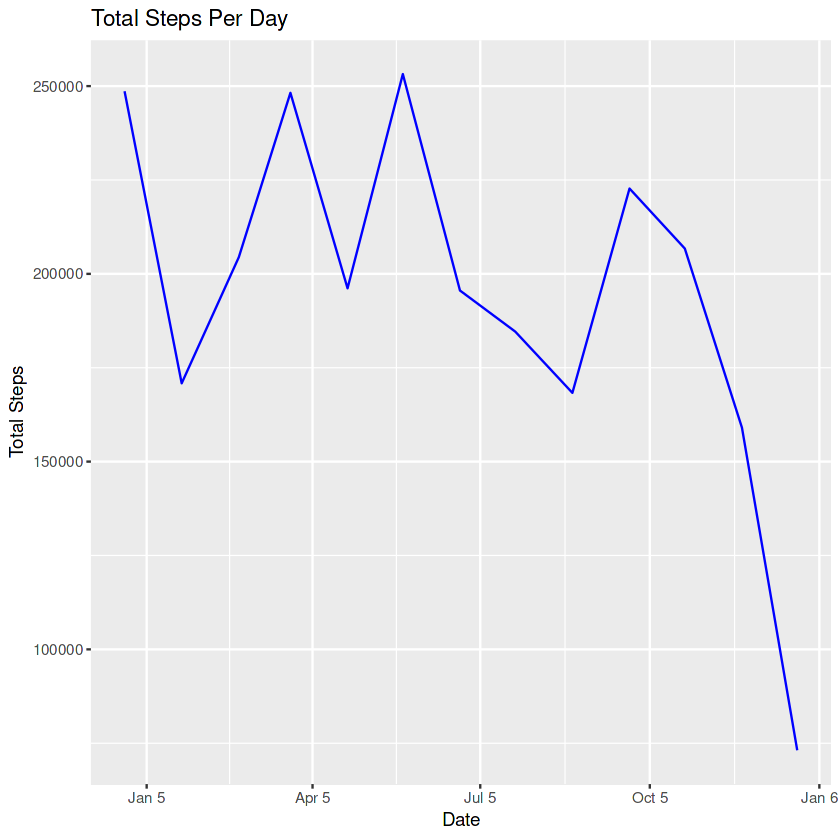

In [89]:
# Summarize total steps and total calories per day
activity_summary <- activity_clean %>%
  group_by(ActivityDate) %>%
  summarize(total_steps = sum(TotalSteps, na.rm = TRUE),
            total_calories = sum(Calories, na.rm = TRUE))  # Ensure Calories is the correct column name

# Convert ActivityDate to Date format
activity_summary$ActivityDate <- as.Date(activity_summary$ActivityDate)

# Remove rows with missing values
activity_summary <- activity_summary %>% na.omit()

# Visualize total steps over time
ggplot(activity_summary, aes(x = ActivityDate, y = total_steps)) +
  geom_line(color = "blue") +
  labs(title = "Total Steps Per Day", x = "Date", y = "Total Steps")

# Average steps per day
average_steps <- mean(activity_clean$TotalSteps, na.rm = TRUE)
print(paste("Average steps per day: ", round(average_steps, 2)))



**2. Sleep pattern analysis**

[1] "Average sleep time per day (minutes):  419.17"


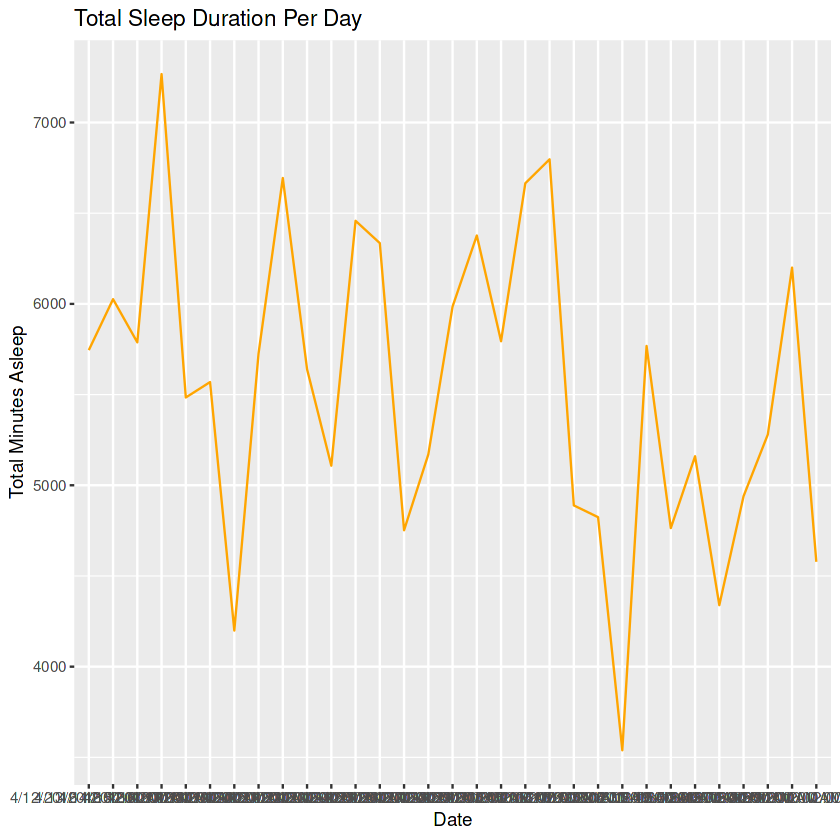

In [90]:
# Summarize total sleep time per day
sleep_summary <- sleep_clean %>%
  group_by(SleepDay) %>%
  summarize(total_sleep_minutes = sum(TotalMinutesAsleep))

# Visualize total sleep duration over time
ggplot(sleep_summary, aes(x = SleepDay, y = total_sleep_minutes, group = 1)) +
  geom_line(color = "orange") +
  labs(title = "Total Sleep Duration Per Day", x = "Date", y = "Total Minutes Asleep")

# Average sleep time per user per day
average_sleep <- mean(sleep_clean$TotalMinutesAsleep)
print(paste("Average sleep time per day (minutes): ", round(average_sleep, 2)))


**3. Calorie and Intensity Analysis**

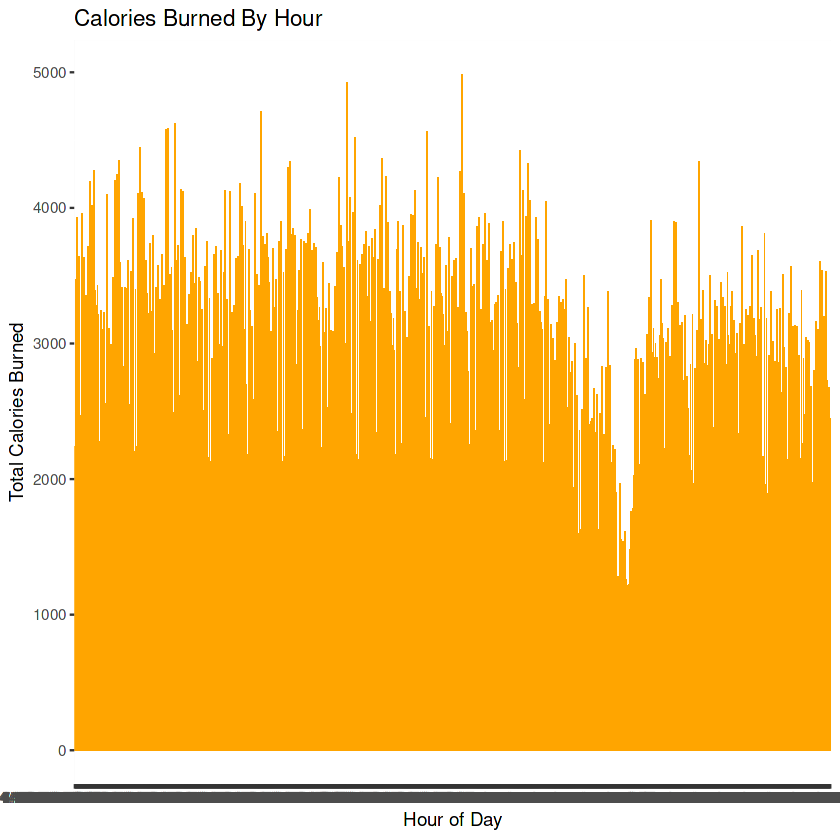

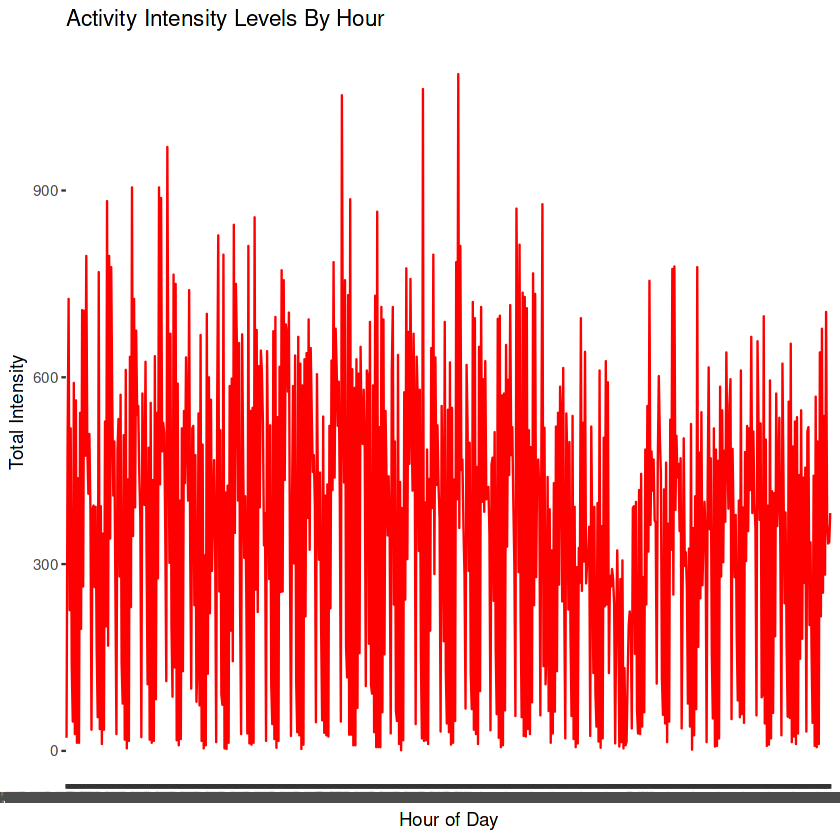

In [91]:
# Summarize total calories burned by hour
calories_summary <- calories %>%
  group_by(ActivityHour) %>%
  summarize(total_calories = sum(Calories))

# Visualize calories burned by hour
ggplot(calories_summary, aes(x = ActivityHour, y = total_calories)) +
  geom_bar(stat="identity", fill="orange") +
  labs(title = "Calories Burned By Hour", x = "Hour of Day", y = "Total Calories Burned")

# Summary of intensities throughout the day
intensities_summary <- intensities %>%
  group_by(ActivityHour) %>%
  summarize(total_intensity = sum(TotalIntensity))

# Visualize intensity levels by hour with proper grouping
ggplot(intensities_summary, aes(x = ActivityHour, y = total_intensity, group = 1)) +
  geom_line(color = "red") +
  labs(title = "Activity Intensity Levels By Hour", x = "Hour of Day", y = "Total Intensity")


**4. Weight and Health Behaviour Analysis**

'data.frame':	1932 obs. of  22 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date                    : chr  "5/2/2016 11:59:59 PM" "5/2/2016 11:59:59 PM" "5/2/2016 11:59:59 PM" "5/2/2016 11:59:59 PM" ...
 $ WeightKg                : num  52.6 52.6 52.6 52.6 52.6 ...
 $ WeightPounds            : num  116 116 116 116 116 ...
 $ Fat                     : int  22 22 22 22 22 22 22 22 22 22 ...
 $ BMI                     : num  22.6 22.6 22.6 22.6 22.6 ...
 $ IsManualReport          : chr  "True" "True" "True" "True" ...
 $ LogId                   : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 $ ActivityDate            : chr  "5/12/2016" "4/19/2016" "4/16/2016" "4/15/2016" ...
 $ TotalSteps              : int  0 15506 12669 9762 12770 13154 10460 13019 15103 11181 ...
 $ TotalDistance           : num  0 9.88 8.16 6.28 8.13 ...
 $ TrackerDistance         : num  0 9.88 8.16 6.28 8.13 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 

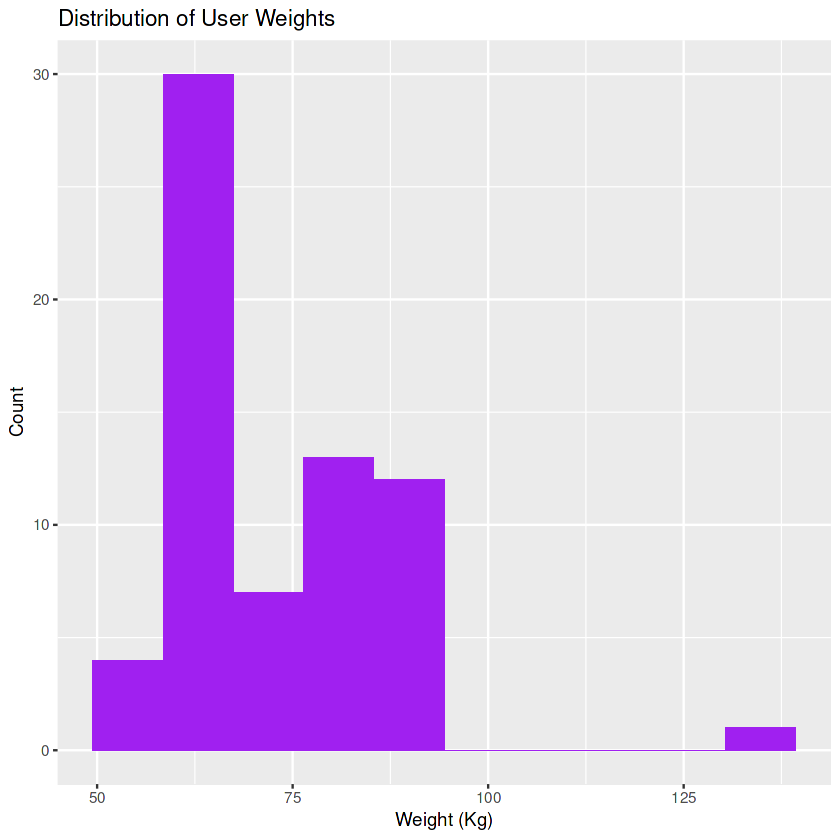

In [92]:
# Assuming both datasets have a common column 'Id' (UserID equivalent)
# Merge the weight and activity datasets by 'Id'
merged_data <- merge(weight, activity_clean, by = "Id")

# Check structure of merged data to confirm merge was successful
str(merged_data)

# Calculate the correlation between weight (WeightKg) and total steps (TotalSteps)
correlation_steps_weight <- cor(merged_data$WeightKg, merged_data$TotalSteps, use = "complete.obs")
print(paste("Correlation between weight and total steps: ", round(correlation_steps_weight, 2)))

# Weight distribution visualization
ggplot(weight, aes(x = WeightKg)) +
  geom_histogram(fill="purple", bins=10) +
  labs(title = "Distribution of User Weights", x = "Weight (Kg)", y = "Count")

In [93]:
# Check column names in weight and activity_clean datasets
colnames(weight)
colnames(activity_clean)

# Merge weight and activity_clean datasets based on a common column
merged_data <- merge(weight, activity_clean, by = "Id")

# Calculate the correlation between weight and total steps in the merged dataset
correlation_steps_weight <- cor(merged_data$WeightKg, merged_data$TotalSteps, use = "complete.obs")
print(paste("Correlation between weight and total steps: ", round(correlation_steps_weight, 2)))



[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Correlation between weight and total steps:  0.14"


**5. Scatter plot for total steps vs calories burned**

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


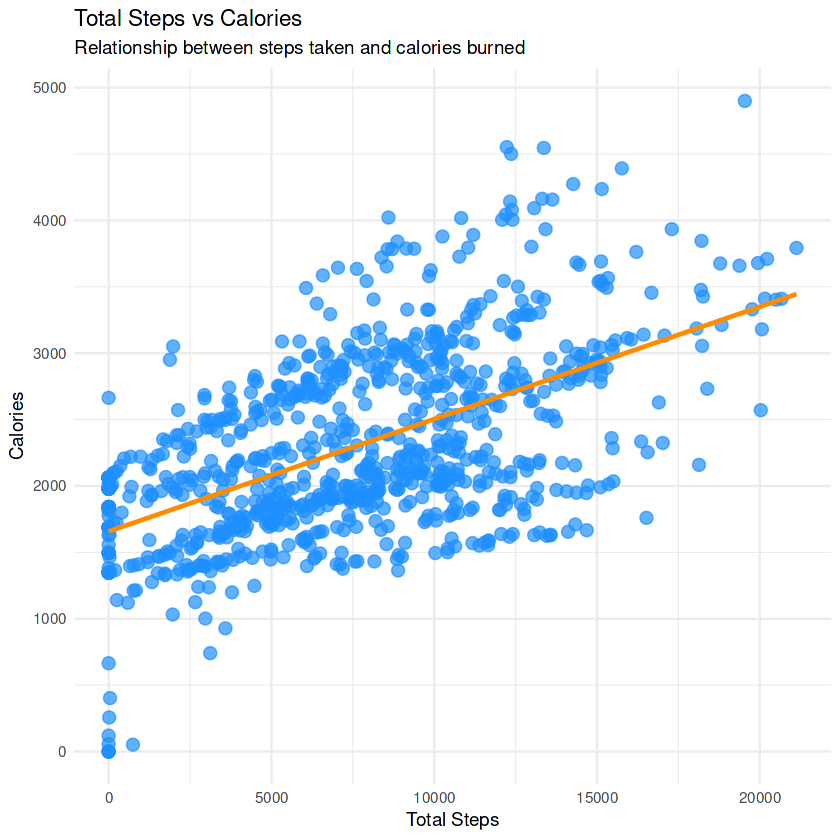

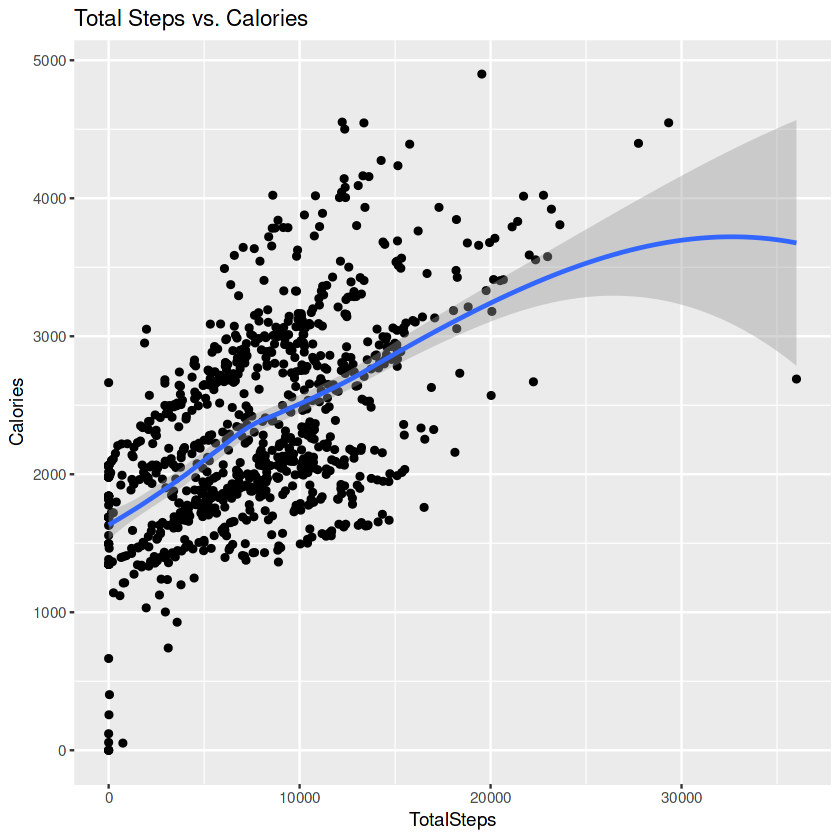

In [94]:
# Scatter plot for total steps vs calories burned with a modern look
ggplot(activity_clean, aes(x = TotalSteps, y = Calories)) +
  geom_point(color = "dodgerblue", size = 3, alpha = 0.7) + # Modern transparency
  geom_smooth(method = "lm", color = "darkorange", se = FALSE) + # Add regression line
  theme_minimal() + # Minimal theme for clean look
  labs(title = "Total Steps vs Calories", 
       subtitle = "Relationship between steps taken and calories burned", 
       x = "Total Steps", 
       y = "Calories")



ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

I see positive correlation here between Total Steps and Calories, which is obvious - the more active we are, the more calories we burn.

**6. Scatter plot for total minutes asleep vs total time in bed**

`geom_smooth()` using formula = 'y ~ x'


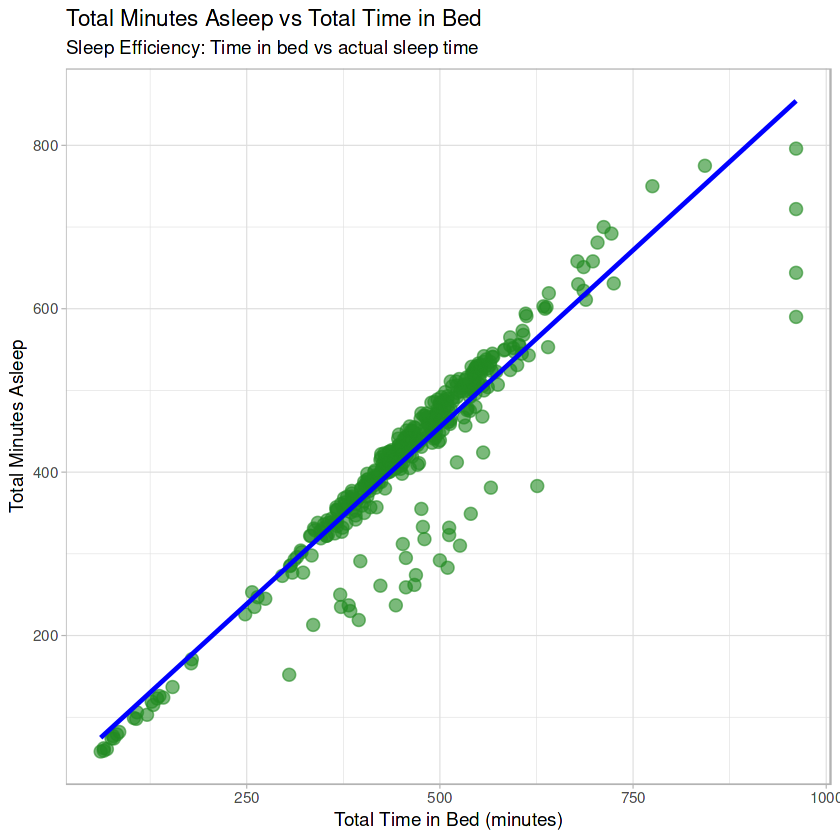

In [95]:
# Scatter plot for total minutes asleep vs total time in bed with a creative design
ggplot(sleep_clean, aes(x = TotalTimeInBed, y = TotalMinutesAsleep)) +
  geom_point(color = "forestgreen", size = 3, alpha = 0.6) + # Transparent green points
  geom_smooth(method = "lm", color = "blue", se = FALSE) + # Blue regression line
  theme_light() + # Clean, light theme
  labs(title = "Total Minutes Asleep vs Total Time in Bed", 
       subtitle = "Sleep Efficiency: Time in bed vs actual sleep time", 
       x = "Total Time in Bed (minutes)", 
       y = "Total Minutes Asleep")


The relationship between Total Minutes Asleep and Total Time in Bed looks linear. So if the Bellabeat users want to improve their sleep, we should consider using notification to go to sleep.

Let's look at activity intensity vs calories burned.

**7. Scatter plot for activity intensity vs calories burned**

'data.frame':	22099 obs. of  5 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 1:00:00 AM" "4/12/2016 1:00:00 PM" "4/12/2016 10:00:00 AM" "4/12/2016 10:00:00 PM" ...
 $ TotalIntensity  : int  8 6 29 9 12 21 20 11 7 36 ...
 $ AverageIntensity: num  0.133 0.1 0.483 0.15 0.2 ...
 $ Calories        : int  61 66 99 65 76 81 81 73 59 110 ...


`geom_smooth()` using formula = 'y ~ x'


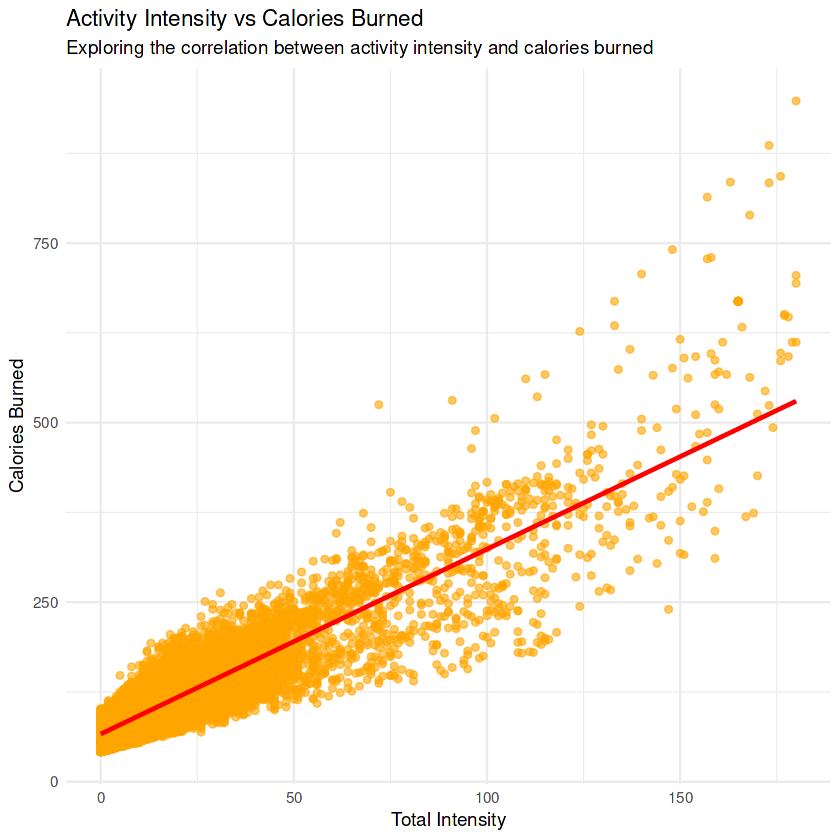

In [96]:
# Merge intensities and calories datasets by 'Id' and 'ActivityHour'
merged_intensity_calories <- merge(intensities, calories, by = c("Id", "ActivityHour"))

# Check structure of the merged dataset
str(merged_intensity_calories)

# Scatter plot for activity intensity vs calories burned
ggplot(merged_intensity_calories, aes(x = TotalIntensity, y = Calories)) +
  geom_point(color = "orange", alpha = 0.6) + # Transparent points for a modern look
  geom_smooth(method = "lm", color = "red", se = FALSE) + # Add regression line
  theme_minimal() + # Modern minimalist theme
  labs(title = "Activity Intensity vs Calories Burned", 
       subtitle = "Exploring the correlation between activity intensity and calories burned", 
       x = "Total Intensity", 
       y = "Calories Burned")



**8. Steps versus sleep quality**

`geom_smooth()` using formula = 'y ~ x'


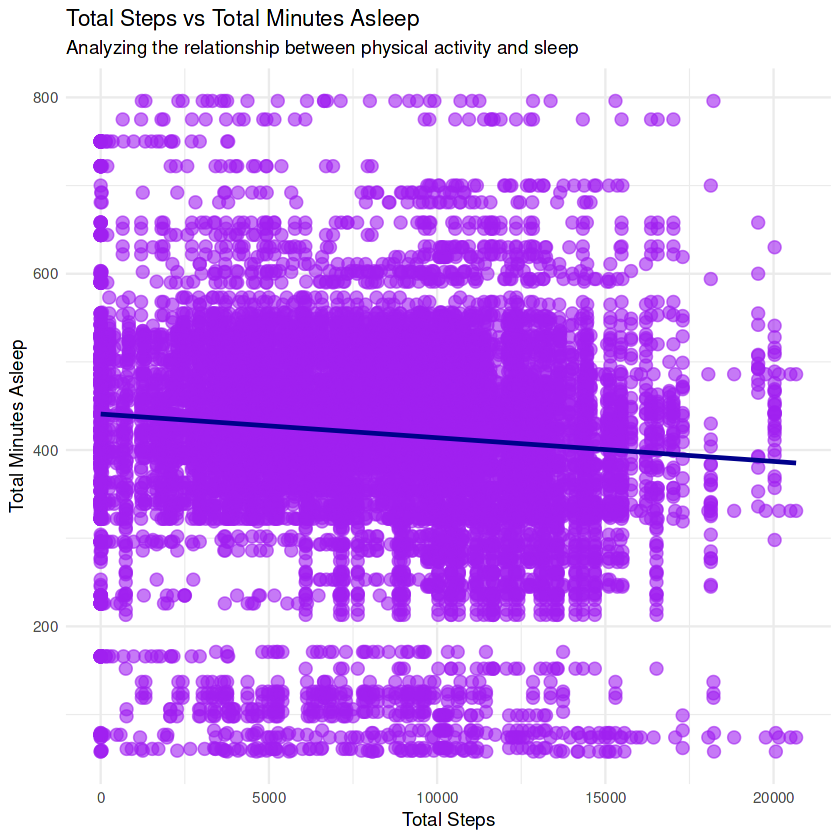

In [97]:
# Merge activity and sleep datasets by 'Id' to analyze the relationship between steps and sleep quality
merged_activity_sleep <- merge(activity_clean, sleep_clean, by = "Id")

# Scatter plot for steps vs total minutes asleep 
ggplot(merged_activity_sleep, aes(x = TotalSteps, y = TotalMinutesAsleep)) +
  geom_point(color = "purple", size = 3, alpha = 0.6) + # Transparent purple points
  geom_smooth(method = "lm", color = "darkblue", se = FALSE) + # Regression line
  theme_minimal() + # Minimalist theme
  labs(title = "Total Steps vs Total Minutes Asleep", 
       subtitle = "Analyzing the relationship between physical activity and sleep", 
       x = "Total Steps", 
       y = "Total Minutes Asleep")




**9. Calories Burned by Time of Day (Creative Bar Chart)**

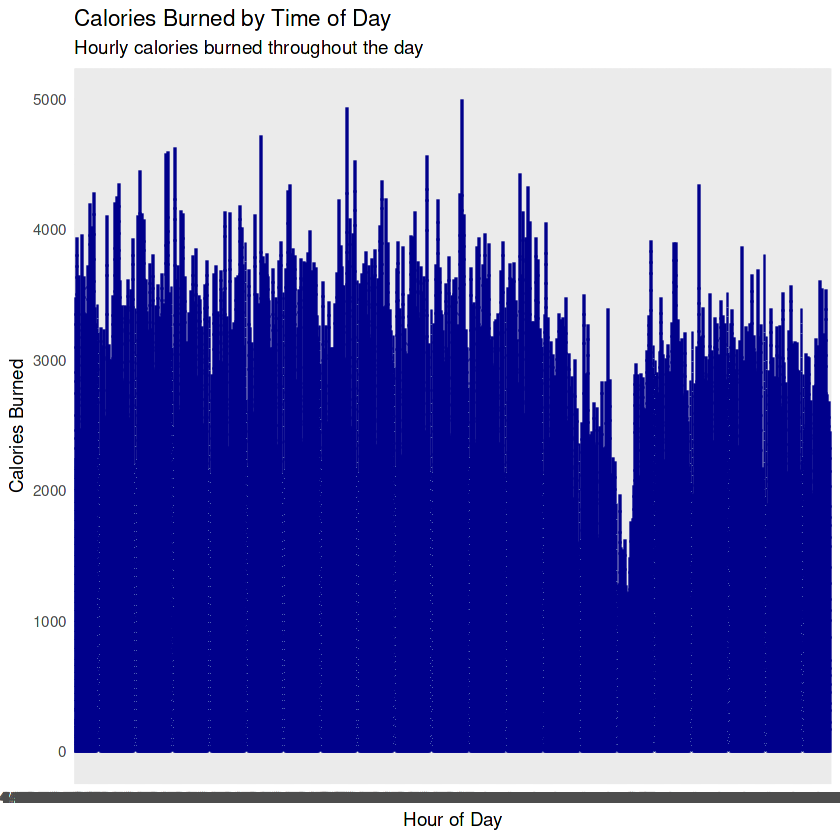

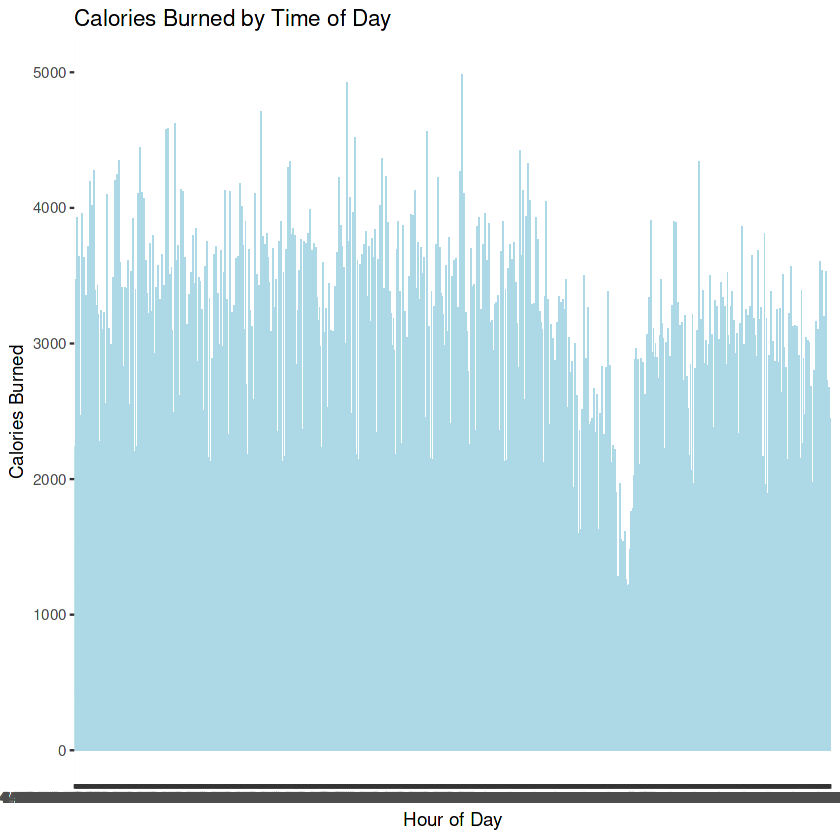

In [99]:
# Bar chart for calories burned by time of day 
ggplot(calories, aes(x = ActivityHour, y = Calories)) +
  geom_bar(stat = "identity", fill = "lightblue", color = "darkblue", alpha = 0.8) + # Light blue bars
  theme_minimal() + # Minimal theme
  labs(title = "Calories Burned by Time of Day", 
       subtitle = "Hourly calories burned throughout the day", 
       x = "Hour of Day", 
       y = "Calories Burned")
# Calories burned by time of day (hourly)
ggplot(calories, aes(x = ActivityHour, y = Calories)) +
  geom_bar(stat="identity", fill="lightblue") +
  labs(title = "Calories Burned by Time of Day", x = "Hour of Day", y = "Calories Burned")

